<a href="https://colab.research.google.com/github/julianonuness/julianonuness/blob/main/Trabalho_Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Especialização em Ciência de Dados aplicada a Políticas Públicas.**#

Disciplina: **Estatística Descritiva**

Professor: **Eduardo Monteiro de Castro Gomes**

Aluno: **Juliano Nunes Dal Bo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Temática**##

O trabalho adotará como temática a avaliação dos recursos repassados aos estados, Distrito 
Federal e municípios para financiamento das ações e procedimentos ambulatoriais 
e hospitalares. No âmbito do Sistema Único de Saúde (SUS) esses recursos são 
denomidados como Limite Financeiro da Média e Alta Complexidade ou Teto MAC.

A Média e Alta Complexidade (MAC) engloba procedimentos que demandam a atuação de profissionais especializados e a utilização de recursos tecnológicos de alto custo, o que acarreta a necessidade de execução de boa parte dos recursos disponibilizados para a área de saúde. 

Dessa forma, a presente análise descritiva buscará abordar os valores despendidos aos entes federativos, per capita, considerando os recursos MAC para enfrentamento da emergência de saúde pública decorrente do coronavírus; os recursos do Teto MAC; e os valores de produção ambulatorial e hospitalar referentes aos serviços executados pelo entes federativos no âmbito do SUS.

##**1) A análise utilizará os seguintes conjuntos de dados:**##



###**1.1) População dos estados.**###

- Variáveis qualitativas

  - Nominais: COD_UF, NOME_ESTADO, UF

- Variáveis quantitativas

  - Discreta: POP_ESTADO   


In [ ]:
uf = pd.read_csv('https://raw.githubusercontent.com/julianonuness/julianonuness/main/ESTADO.csv', sep=',', na_values='-', dtype={'COD_UF': 'str'})
uf.head()

,COD_UF,NOME_ESTADO,UF,POP_ESTADO
0,11,Rondônia,RO,1796460
1,12,Acre,AC,894470
2,13,Amazonas,AM,4207714
3,14,Roraima,RR,631181
4,15,Pará,PA,8690745


### **1.2) Dados referentes aos recursos MAC repassados aos entes federativos em 2020, exclusivamente para enfrentamento da COVID-19.** ###


- Variáveis qualitativas

  - Nominais: Número_da_Publicação, Assunto, Região, Estado

- Variáveis quantitativas

  - Contínuas: Total

In [ ]:
mac_covid = pd.read_csv('https://raw.githubusercontent.com/julianonuness/julianonuness/main/Recursos%20MAC%20Covid%202020.csv', sep=',', decimal='.')
mac_covid.head()

,Número_da_Publicação,Assunto,Região,Estado,Total
0,GM 03896/2020,PANDEMIA,NORTE,AC,13296294.00
1,GM 03896/2020,PANDEMIA,NORTE,AM,25490722.40
2,GM 03896/2020,PANDEMIA,NORTE,AP,13685332.23
3,GM 03896/2020,PANDEMIA,NORTE,PA,43874385.12
4,GM 03896/2020,PANDEMIA,NORTE,RO,17744382.76


**1.2.1) O tratamento de dados envolveu:**

a) Alteração da coluna "Número_da_Publicação" e dos seus valores para contemplar apenas o ano da publicação da portaria, que se refere ao ano de disponibilização dos recursos.

In [ ]:
mac_covid.rename(columns = {'Número_da_Publicação': 'Ano'}, inplace = True)
mac_covid['Ano'] = mac_covid['Ano'].apply(lambda x: x.split('/')[-1])
mac_covid[mac_covid['Ano'] == '2020']
mac_covid.head()

,Ano,Assunto,Região,Estado,Total
0,2020,PANDEMIA,NORTE,AC,13296294.00
1,2020,PANDEMIA,NORTE,AM,25490722.40
2,2020,PANDEMIA,NORTE,AP,13685332.23
3,2020,PANDEMIA,NORTE,PA,43874385.12
4,2020,PANDEMIA,NORTE,RO,17744382.76


b) Consolidação dos recursos MAC, por região e estado, repassados aos entes federativos para enfrentamento da COVID-19. Elaboração da coluna "Total_percapita" para aplicação das medidas de posição, elaboração dos gráficos e comparação com os outros conjuntos de dados apresentados.

In [ ]:
mac_covid = mac_covid['Total'].groupby([mac_covid['Região'],mac_covid['Estado']]).sum()
mac_covid = mac_covid.reset_index()
mac_covid = mac_covid.merge(uf, left_on='Estado', right_on='UF')
mac_covid.drop(columns=['UF'], inplace=True)
mac_covid = mac_covid[['Região','COD_UF','Estado','NOME_ESTADO', 'POP_ESTADO', 'Total']]
mac_covid['Total_percapita'] = round(mac_covid['Total']/mac_covid['POP_ESTADO'],2)
mac_covid.sort_values('Total_percapita', inplace=True)
mac_covid.head()

,Região,COD_UF,Estado,NOME_ESTADO,POP_ESTADO,Total,Total_percapita
0,CENTRO-OESTE,53,DF,Distrito Federal,3055149,2.857320e+08,93.52
16,NORTE,15,PA,Pará,8690745,8.897434e+08,102.38
15,NORTE,16,AP,Amapá,861773,8.894884e+07,103.22
22,SUDESTE,33,RJ,Rio de Janeiro,17366189,1.811748e+09,104.33
14,NORTE,13,AM,Amazonas,4207714,4.655411e+08,110.64


**1.2.2) Medidas descritivas referentes a média, mediana, desvio padrão e coeficiente de variação.**

a) Definição de duas funções para aplicação nos conjuntos de dados.

In [ ]:
def med_desc(df):
  mean = round(df['Total_percapita'].mean(),2)
  median = round(df['Total_percapita'].median(),2)
  std = round(df['Total_percapita'].std(),2)
  return print(f'Média (Total percapita) = {mean}', f'\nMediana (Total percapita) = {median}', f'\nDesvio Padrão (Total percapita) = {std}')  
def coef_var(df):
  mean = round(df['Total_percapita'].mean(),2)
  std = round(df['Total_percapita'].std(),2)
  cv=round(std/mean*100,2)
  if cv <= 15:
   return print(f'Coeficiente de Variação = {cv}% - baixa dispersão: dados homogêneos')
  if cv > 15 and cv <= 40:
   return print(f'Coeficiente de Variação = {cv}% - média dispersão')
  else:
   return print(f'Coeficiente de Variação = {cv}% - alta dispersão: dados heterogêneos')

In [ ]:
med_desc(mac_covid)
coef_var(mac_covid)

Média (Total percapita) = 145.48 
Mediana (Total percapita) = 145.18 
Desvio Padrão (Total percapita) = 26.88
Coeficiente de Variação = 18.48% - média dispersão


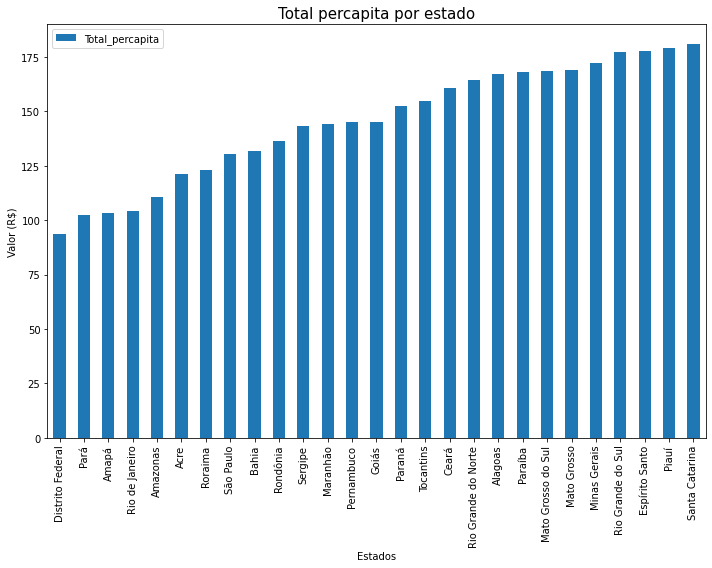

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
mac_covid.plot(kind='bar',x='NOME_ESTADO',y='Total_percapita', ax=ax)
ax.set_title("Total percapita por estado",fontdict={'fontsize':15})
ax.set_xlabel('Estados')
ax.set_ylabel('Valor (R$)')
ax.tick_params(labelsize=10)
fig.tight_layout()
plt.show()

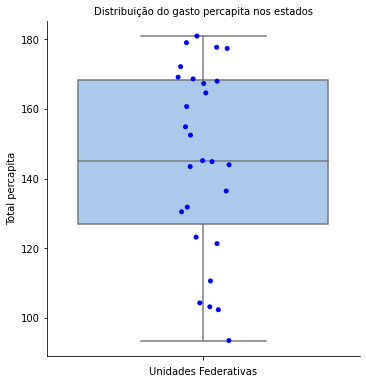

In [ ]:
sns.catplot(y='Total_percapita', kind="box",data=mac_covid, height=5, palette='pastel')
sns.stripplot(y='Total_percapita', data=mac_covid, color="blue",hue='Estado')
plt.title('Distribuição do gasto percapita nos estados', fontsize=10)
plt.xlabel('Unidades Federativas')
plt.ylabel('Total percapita')
plt.show()

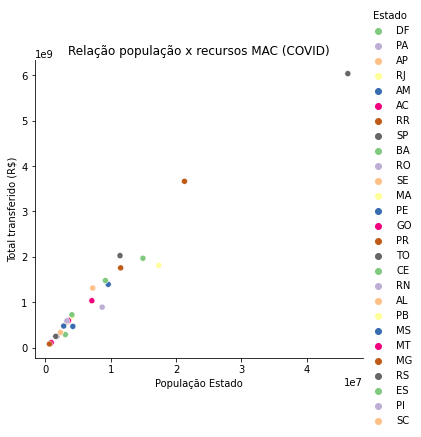

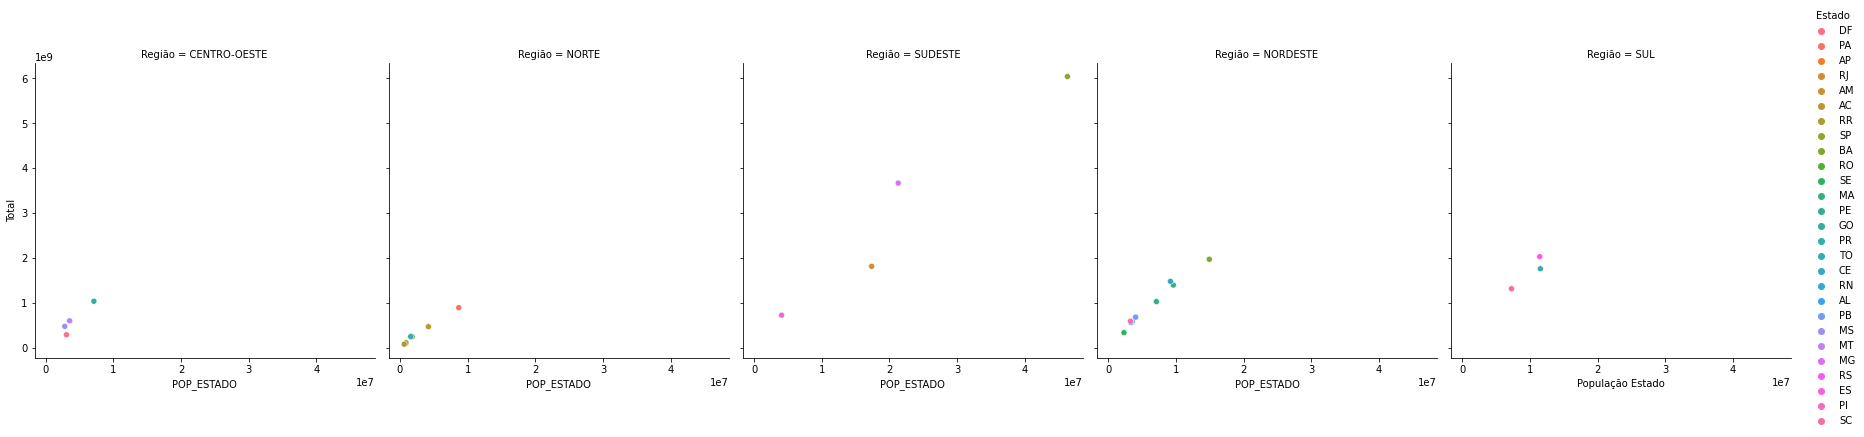

In [ ]:
sns.relplot(x="POP_ESTADO", y="Total", hue='Estado', data=mac_covid,height=5, palette='Accent')
plt.title('Relação população x recursos MAC (COVID)', fontsize=12)
plt.xlabel('População Estado')
plt.ylabel('Total transferido (R$)')
sns.relplot(x="POP_ESTADO", y="Total", hue='Estado', data=mac_covid, col='Região')
plt.xlabel('População Estado')
plt.ylabel('Total de recursos repassado')
plt.show()

## **Conclusão** ##

As medidas de posição indicaram uma distribuição simétrica dos dados sobre o total per capita, com a média e mediana se apresentando em valores quase idênticos. O coeficiente de variação alcançou 18,48%, apontando para uma média dispersão dos dados. 

No gráfico de barras verifica-se que os estados de Santa Catarina, Piauí e Espírito Santo foram as unidades federativas que mais receberam recursos federais por habitante no âmbito do MAC para enfrentamento da Covid-19.  No lado oposto, destacam-se negativamente o Distrito Federal e os estados do Pará e Amapá. 

O gráfico boxplot não indicou a ocorrência de valores discrepantes (outliers), mas é possível verificar que 50% dos estados que se posicionam acima da mediana apresentam uma concentração de valores per capita maiores (entre 145,18 a 180,92 reais) do que os outros 50% abaixo da mediana (entre 93,52 a 145,18 reais).

O gráfico de dispersão indica poucos estados de descolando de uma linha central, mas no geral percebe-se que há a manutenção de uma relação entre a população dos estados e o total de recursos transferidos. 


### **1.3) Dados referentes aos recursos federais destinados ao financiamento de ações e serviços ambulatoriais e hospitalares de média e alta complexidade (Teto MAC), por estado.**

- Variáveis qualitativas

  - Nominais: COD_UF, NOME_ESTADO, UF

- Variáveis quantitativas

  - Contínuas: 2017 a 2020



In [ ]:
teto_mac = pd.read_csv('https://raw.githubusercontent.com/julianonuness/julianonuness/main/Limite%20Teto%20Mac%20Estados%202017%20a%202020.csv', sep=',', na_values='-', decimal='.',  dtype={'COD_UF': str})
teto_mac.head()

,COD_UF,NOME_ESTADO,UF,2017,2018,2019,2020
0,11,Rondônia,RO,3.628640e+08,3.940109e+08,4.009512e+08,4.045951e+08
1,12,Acre,AC,1.951294e+08,1.991354e+08,2.044677e+08,2.048120e+08
2,13,Amazonas,AM,5.649041e+08,5.644272e+08,5.740311e+08,5.652350e+08
3,14,Roraima,RR,1.207170e+08,1.339239e+08,1.367971e+08,1.369934e+08
4,15,Pará,PA,1.149954e+09,1.181004e+09,1.267017e+09,1.297795e+09


**1.3.1) O tratamento dos dados envolveu:**

a) A junção do dataset "teto_mac" com o dataset "Uf", indicação do total repassado entre 2017 a 2020, além da inclusão da coluna "Total_percapita".

In [ ]:
teto_mac['Total'] = teto_mac['2017'] + teto_mac['2018'] + teto_mac['2019'] + teto_mac['2020']
teto_mac = teto_mac.merge(uf, on='COD_UF')
teto_mac.drop(columns=['NOME_ESTADO_y', 'UF_y'], inplace=True)
teto_mac.rename(columns={'NOME_ESTADO_x':'NOME_ESTADO','UF_x':'UF'}, inplace=True)
teto_mac = teto_mac[['COD_UF','UF','NOME_ESTADO','POP_ESTADO','2017','2018', '2019', '2020', 'Total']]
teto_mac['Total_percapita'] = round(teto_mac['2020']/teto_mac['POP_ESTADO'], 2)
teto_mac.sort_values('Total_percapita', inplace=True)
teto_mac.iloc[:,[0,1,2,3,8,9]].head()

,COD_UF,UF,NOME_ESTADO,POP_ESTADO,Total,Total_percapita
2,13,AM,Amazonas,4207714,2.268597e+09,134.33
4,15,PA,Pará,8690745,4.895770e+09,149.33
5,16,AP,Amapá,861773,4.954744e+08,151.06
7,21,MA,Maranhão,7114598,4.415572e+09,160.61
26,53,DF,Distrito Federal,3055149,1.970574e+09,171.06


**1.3.2) Medidas descritivas referentes a média, mediana, desvio padrão e coeficiente de variação.**

In [ ]:
med_desc(teto_mac)
coef_var(teto_mac)

Média (Total percapita) = 212.86 
Mediana (Total percapita) = 219.02 
Desvio Padrão (Total percapita) = 34.39
Coeficiente de Variação = 16.16% - média dispersão


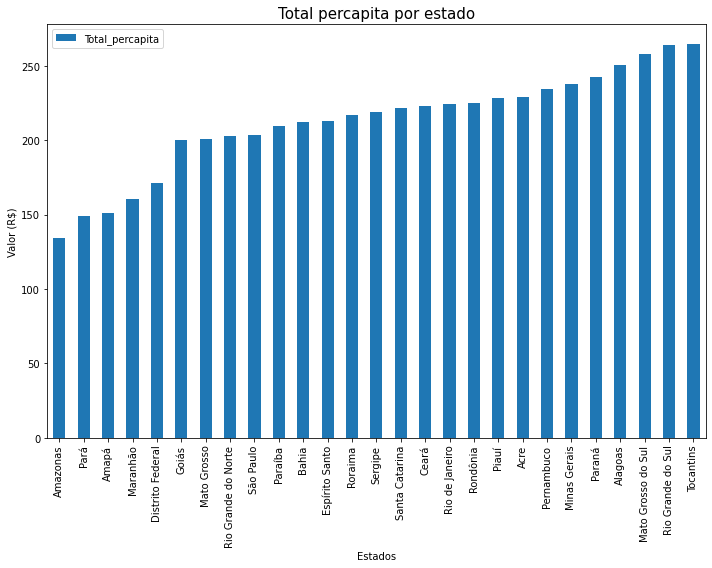

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
teto_mac.plot(kind='bar',x='NOME_ESTADO',y='Total_percapita', ax=ax)
ax.set_title("Total percapita por estado",fontdict={'fontsize':15})
ax.set_xlabel('Estados')
ax.set_ylabel('Valor (R$)')
ax.tick_params(labelsize=10)
fig.tight_layout()
plt.show()

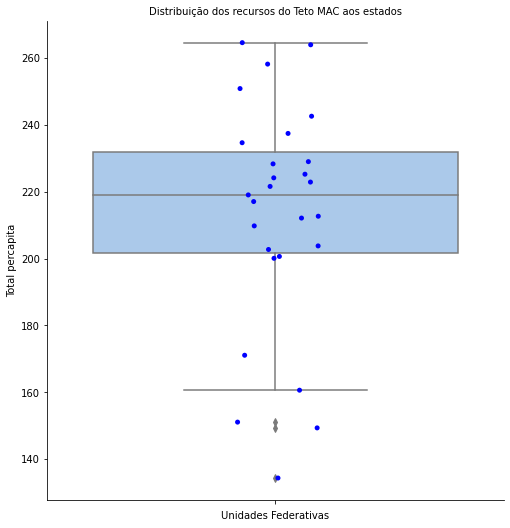

In [ ]:
sns.catplot(y='Total_percapita', kind="box",data=teto_mac,height=7, palette='pastel')
sns.stripplot(y='Total_percapita', data=teto_mac, color="blue",hue='UF')
plt.title('Distribuição dos recursos do Teto MAC aos estados', fontsize=10)
plt.xlabel('Unidades Federativas')
plt.ylabel('Total percapita')
plt.show()

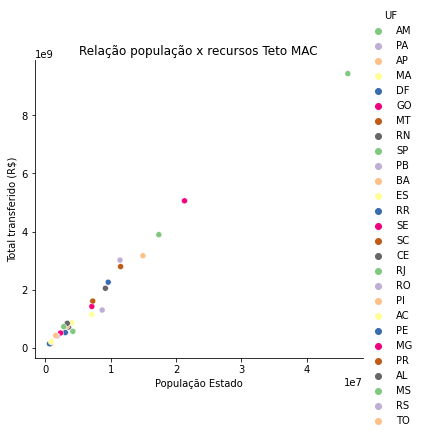

In [ ]:
sns.relplot(x="POP_ESTADO", y="2020", hue='UF', data=teto_mac,height=5, palette='Accent')
plt.title('Relação população x recursos Teto MAC', fontsize=12)
plt.xlabel('População Estado')
plt.ylabel('Total transferido (R$)')
plt.show()

## **Conclusão** ##

As medidas de posição indicaram uma distribuição assimétrica negativa dos dados sobre o total per capita, com a mediana se sobrepondo à média. O coeficiente de variação alcançou 16,16%, apontando para uma média dispersão dos dados. 

O gráfico de barras indicou que os estados de Tocantins, Rio Grande do Sul e Mato Grosso do Sul apresentaram os maiores valores per capita por habitante no âmbito do Teto-MAC.  No lado oposto, destacam-se negativamente o Amazonas, Pará, Amapá, Maranhão e Distrito Federal, apresentando uma variação mais heterogênea em relação ao restante das unidades federativas. Verifica-se que coeficiente de variação poderia ter indicado inclusive uma homogeneidade maior, porém os cincos estados com os menores totais per capita se descolaram do nível de variação dos outros estados, provavelmente impactando sobre esse aspecto.

O gráfico boxplot indicou a ocorrência de valores discrepantes (outliers) para 3 unidades federativas. Da mesma forma que no caso anterior, foi possível verificar que 50% dos estados que se posicionaram acima da mediana apresentaram uma concentração de valores per capita maiores (entre 219,02 a 264,57 reais) do que os outros 50% abaixo da mediana (entre 134,33 a 219,02 reais).

Da mesma forma que apresentado anteriormente, o gráfico de dispersão indicou poucos estados de descolando de uma linha central e no geral havendo uma certa relação entre a população dos estados e o total de recursos transferidos pelo Teto MAC. 


### **1.4) Dados referentes aos valores aprovados de produção ambulatorial e hospitalar dos entes federativos entre os exercícios de 2017 a 2020.**

**1.4.1) Dados do sistema de informação hospitalar e ambulatorial - Valores aprovados de produção hospitalar e ambulatorial por Município.**

- Variáveis qualitativas

  - Nominais: Município Gestor

- Variáveis quantitativas

  - Contínuas: 2017 a 2020, Total

In [ ]:
sih = pd.read_csv('https://raw.githubusercontent.com/julianonuness/julianonuness/main/Produ%C3%A7%C3%A3o%20SIH%202017%20a%202020%20-%20Valor%20aprovado.csv',sep=';', na_values='-', skiprows=4, skipfooter=12, encoding='latin1', engine='python', decimal=',')
sih.head()


,Município gestor,2017,2018,2019,2020,Total
0,110001 Alta Floresta D'Oeste,626343.21,653669.39,652942.03,480319.05,2413273.68
1,110037 Alto Alegre dos Parecis,190399.87,122482.11,121618.02,123692.17,558192.17
2,110040 Alto Paraíso,129443.66,117265.94,142301.54,130504.45,519515.59
3,110034 Alvorada D'Oeste,179733.93,210702.35,167355.11,96707.73,654499.12
4,110002 Ariquemes,2926806.13,2619731.04,2840560.44,5627018.38,14014115.99


In [ ]:
sia = pd.read_csv('https://raw.githubusercontent.com/julianonuness/julianonuness/main/Produ%C3%A7%C3%A3o%20SIA%202017%20a%202020%20-%20Valor%20aprovado.csv',sep=';', na_values='-', skiprows=4, skipfooter=12, encoding='latin1', engine='python', decimal=',')
sia.head()

,Município gestor,2017,2018,2019,2020,Total
0,110001 Alta Floresta D'Oeste,621403.84,625953.26,648806.99,650691.20,2546855.29
1,110037 Alto Alegre dos Parecis,11386.19,182484.07,146321.52,185304.33,525496.11
2,110040 Alto Paraíso,24215.94,42984.93,213873.05,251764.14,532838.06
3,110034 Alvorada D'Oeste,264871.45,366903.28,287068.43,20037.86,938881.02
4,110002 Ariquemes,4425683.48,4928124.22,6406874.89,5198273.92,20958956.51


**1.4.2) No tratamento de dados foram realizados:**

a) O isolamento do código IBGE para junção dos dois datasets (Sih e Sia)

In [ ]:
sih.rename(columns={'Município gestor': 'Municipio'}, inplace= True)
sih['cod_ibge'] = [x.split(' ')[0] for x in sih['Municipio']]
sih['Municipio'] = [' '.join(x.split(' ')[1:]) for x in sih['Municipio']]
sih.drop([2110], inplace=True)
sih = sih[['cod_ibge', 'Municipio','2017', '2018','2019','2020','Total']]
sih.head()

,cod_ibge,Municipio,2017,2018,2019,2020,Total
0,110001,Alta Floresta D'Oeste,626343.21,653669.39,652942.03,480319.05,2413273.68
1,110037,Alto Alegre dos Parecis,190399.87,122482.11,121618.02,123692.17,558192.17
2,110040,Alto Paraíso,129443.66,117265.94,142301.54,130504.45,519515.59
3,110034,Alvorada D'Oeste,179733.93,210702.35,167355.11,96707.73,654499.12
4,110002,Ariquemes,2926806.13,2619731.04,2840560.44,5627018.38,14014115.99


In [ ]:
sia.rename(columns={'Município gestor': 'Municipio'}, inplace= True)
sia['cod_ibge'] = sia['Municipio'].apply(lambda x: x.split(' ')[0])
sia['Municipio'] = sia['Municipio'].apply(lambda x: ' '.join(x.split(' ')[1:]))
sia.drop([4355], inplace = True)
sia = sia[['cod_ibge', 'Municipio','2017', '2018','2019','2020','Total']]
sia.head()

,cod_ibge,Municipio,2017,2018,2019,2020,Total
0,110001,Alta Floresta D'Oeste,621403.84,625953.26,648806.99,650691.20,2546855.29
1,110037,Alto Alegre dos Parecis,11386.19,182484.07,146321.52,185304.33,525496.11
2,110040,Alto Paraíso,24215.94,42984.93,213873.05,251764.14,532838.06
3,110034,Alvorada D'Oeste,264871.45,366903.28,287068.43,20037.86,938881.02
4,110002,Ariquemes,4425683.48,4928124.22,6406874.89,5198273.92,20958956.51


b) Concatenação dos dois datasets; agrupamento do conjunto de dados por código IBGE e  município, apresentando como resultado a soma do valor total per capita da produção ambulatorial e hospitalar por município; e, por fim, agrupamento por estado.

In [ ]:
prod_sia_sih = pd.concat([sia,sih]).groupby(['cod_ibge', 'Municipio']).sum()
prod_sia_sih.reset_index(inplace=True)
prod_sia_sih['uf']=[x[0:2] for x in prod_sia_sih['cod_ibge']]
prod_sia_sih = prod_sia_sih.groupby('uf').sum()
prod_sia_sih.reset_index(inplace=True)
prod_sia_sih.rename(columns={'uf':'COD_UF'}, inplace=True)
prod_sia_sih = prod_sia_sih.merge(uf, on='COD_UF')
prod_sia_sih = prod_sia_sih[['COD_UF','UF','NOME_ESTADO','POP_ESTADO','2017','2018', '2019', '2020', 'Total']]
prod_sia_sih['Total_percapita'] = round(prod_sia_sih['2020']/prod_sia_sih['POP_ESTADO'], 2)
prod_sia_sih.sort_values('Total_percapita', inplace=True)
prod_sia_sih.iloc[:,[0,1,2,3,7,9]].head()

,COD_UF,UF,NOME_ESTADO,POP_ESTADO,2020,Total_percapita
5,16,AP,Amapá,861773,5.786015e+07,67.14
1,12,AC,Acre,894470,7.890712e+07,88.22
14,28,SE,Sergipe,2318822,2.158531e+08,93.09
4,15,PA,Pará,8690745,8.567525e+08,98.58
2,13,AM,Amazonas,4207714,4.363115e+08,103.69


**1.4.3) Medidas descritivas referentes a média, mediana, desvio padrão e coeficiente de variação.**

In [ ]:
med_desc(prod_sia_sih)
coef_var(prod_sia_sih)

Média (Total percapita) = 126.68 
Mediana (Total percapita) = 123.13 
Desvio Padrão (Total percapita) = 27.88
Coeficiente de Variação = 22.01% - média dispersão


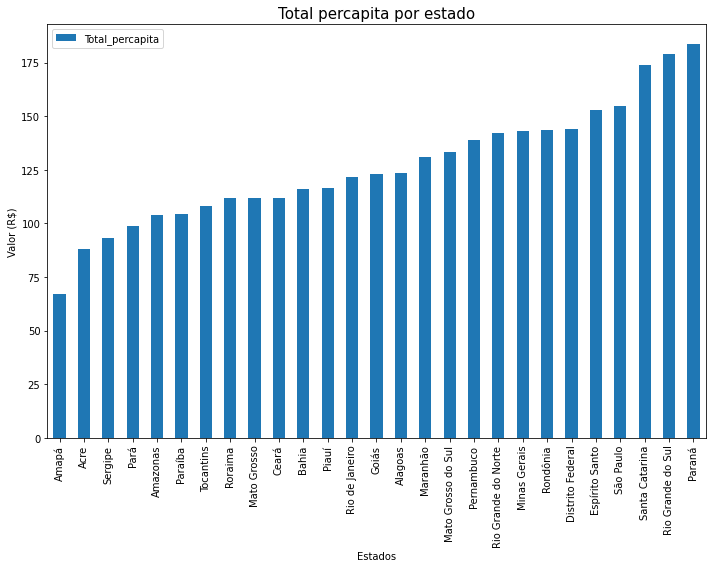

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
prod_sia_sih.plot(kind='bar',x='NOME_ESTADO',y='Total_percapita', ax=ax)
ax.set_title("Total percapita por estado",fontdict={'fontsize':15})
ax.set_xlabel('Estados')
ax.set_ylabel('Valor (R$)')
ax.tick_params(labelsize=10)
fig.tight_layout()
plt.show()

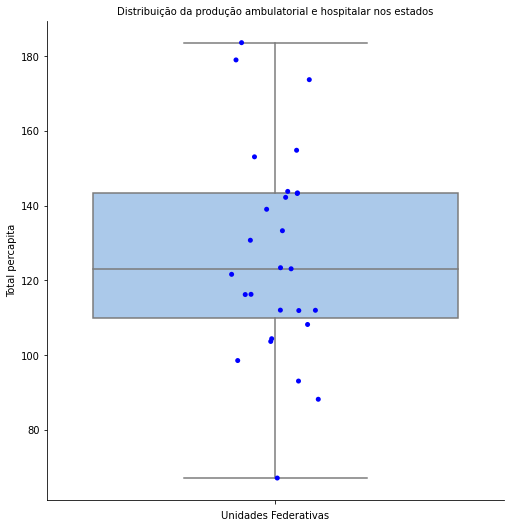

In [ ]:
sns.catplot(y='Total_percapita', kind="box",data=prod_sia_sih,height=7, palette='pastel')
sns.stripplot(y='Total_percapita', data=prod_sia_sih, color="blue",hue='UF')
plt.title('Distribuição da produção ambulatorial e hospitalar nos estados', fontsize=10)
plt.xlabel('Unidades Federativas')
plt.ylabel('Total percapita')
plt.show()

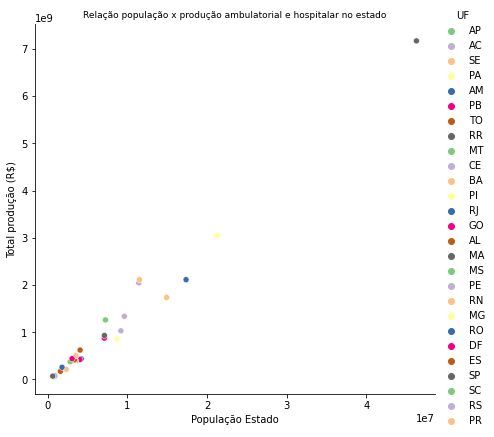

In [ ]:
sns.relplot(x="POP_ESTADO", y="2020", hue='UF', data=prod_sia_sih, height=6, palette='Accent')
plt.title('Relação população x produção ambulatorial e hospitalar no estado', fontsize=9)
plt.xlabel('População Estado')
plt.ylabel('Total produção (R$)')
plt.show()

## **Conclusão** ##

As medidas de posição indicaram uma distribuição assimétrica positiva dos dados sobre o total per capita, com a média se sobrepondo à mediana. O coeficiente de variação alcançou 22,01%, apontando para uma média dispersão dos dados. Dos 3 datasets analisados, este foi o que apresentou a maior heterogeneidade dos dados.

O gráfico de barras indicou que os estados da Região Sul (Paraná, Rio Grande do Sul e Santa Catarina) apresentaram os maiores valores per capita de produção de procedimentos hospitalares e ambulatoriais por habitante, ressaltando-se ainda que esses estados apresentaram o total per capita em um patamar acima dos demais entes.  No lado oposto, destacam-se negativamente o Amapá, Acre e Sergipe como os estados que apresentaram os menores valores per capita de produção, havendo uma variação maior no estado do Amapá em relação ao restante do conjunto de dados. 

O gráfico boxplot não indicou a ocorrência de valores discrepantes (outliers). De forma diversa dos casos anteriores, foi possível verificar que não houve uma concentração significativa de valores per capita por estados que se posicionaram abaixo ou acima da mediana.

O gráfico de dispersão indicou um quantitativo maior de estados de descolando de uma linha central em relação aos outros conjuntos de dados, mas no geral havendo ainda indicação de relação entre a população dos estados e o total de recursos transferidos. 


**1.4.4) Variação produção e teto 2017 a 2020**

De forma complementar, e ainda utilizando os datasets Sih, Sia e Teto MAC, ralizou-se uma comparação da variação entre os exercícios 2017 a 2020 de produção ambulatorial/hospitalar e dos recursos recebidos pelo Teto MAC. O tratamento dos dados envolveu o estabelecimento das colunas "Variação_teto_17_20(%)" e "Variação_prod_17_20(%)".

In [ ]:
teto_mac['Variação_teto_17_18(%)'] = round((teto_mac['2018'] - teto_mac['2017'])/teto_mac['2017']*100,2)
teto_mac['Variação_teto_18_19(%)'] = round((teto_mac['2019'] - teto_mac['2018'])/teto_mac['2018']*100,2)
teto_mac['Variação_teto_19_20(%)'] = round((teto_mac['2020'] - teto_mac['2019'])/teto_mac['2019']*100,2)
teto_mac['Variação_teto_17_20(%)'] = round((teto_mac['2020'] - teto_mac['2017'])/teto_mac['2017']*100,2)
teto_mac_var = teto_mac.drop(columns=['POP_ESTADO', '2017', '2018', '2019','2020', 'Total', 'Total_percapita'])
teto_mac_var.head()

,COD_UF,UF,NOME_ESTADO,Variação_teto_17_18(%),Variação_teto_18_19(%),Variação_teto_19_20(%),Variação_teto_17_20(%)
2,13,AM,Amazonas,-0.08,1.70,-1.53,0.06
4,15,PA,Pará,2.70,7.28,2.43,12.86
5,16,AP,Amapá,1.14,4.64,3.37,9.39
7,21,MA,Maranhão,0.59,4.67,1.43,6.80
26,53,DF,Distrito Federal,-1.36,3.64,6.22,8.59


In [ ]:
prod_sia_sih['Variação_prod_17_18(%)'] = round((prod_sia_sih['2018'] - prod_sia_sih['2017'])/prod_sia_sih['2017']*100,2)
prod_sia_sih['Variação_prod_18_19(%)'] = round((prod_sia_sih['2019'] - prod_sia_sih['2018'])/prod_sia_sih['2018']*100,2)
prod_sia_sih['Variação_prod_19_20(%)'] = round((prod_sia_sih['2020'] - prod_sia_sih['2019'])/prod_sia_sih['2019']*100,2)
prod_sia_sih['Variação_prod_17_20(%)'] = round((prod_sia_sih['2020'] - prod_sia_sih['2017'])/prod_sia_sih['2017']*100,2)
prod_sia_sih_var = prod_sia_sih.drop(columns=['POP_ESTADO', '2017', '2018', '2019','2020', 'Total', 'Total_percapita'])
prod_sia_sih_var.head()

,COD_UF,UF,NOME_ESTADO,Variação_prod_17_18(%),Variação_prod_18_19(%),Variação_prod_19_20(%),Variação_prod_17_20(%)
5,16,AP,Amapá,19.04,9.82,-12.70,14.13
1,12,AC,Acre,-3.36,7.56,-12.94,-9.51
14,28,SE,Sergipe,10.47,9.55,-5.74,14.08
4,15,PA,Pará,6.53,5.96,-1.57,11.11
2,13,AM,Amazonas,3.67,9.32,-7.43,4.91


In [ ]:
teto_mac_var_17_20 = teto_mac_var.iloc[:,[0,1,2,6]]
prod_sia_sih_var_17_20 = prod_sia_sih_var.iloc[:,[0,1,2,6]]
teto_prod = teto_mac_var_17_20.merge(prod_sia_sih_var_17_20.iloc[:,[0,3]], on='COD_UF')
teto_prod.head()

,COD_UF,UF,NOME_ESTADO,Variação_teto_17_20(%),Variação_prod_17_20(%)
0,13,AM,Amazonas,0.06,4.91
1,15,PA,Pará,12.86,11.11
2,16,AP,Amapá,9.39,14.13
3,21,MA,Maranhão,6.80,25.75
4,53,DF,Distrito Federal,8.59,24.58


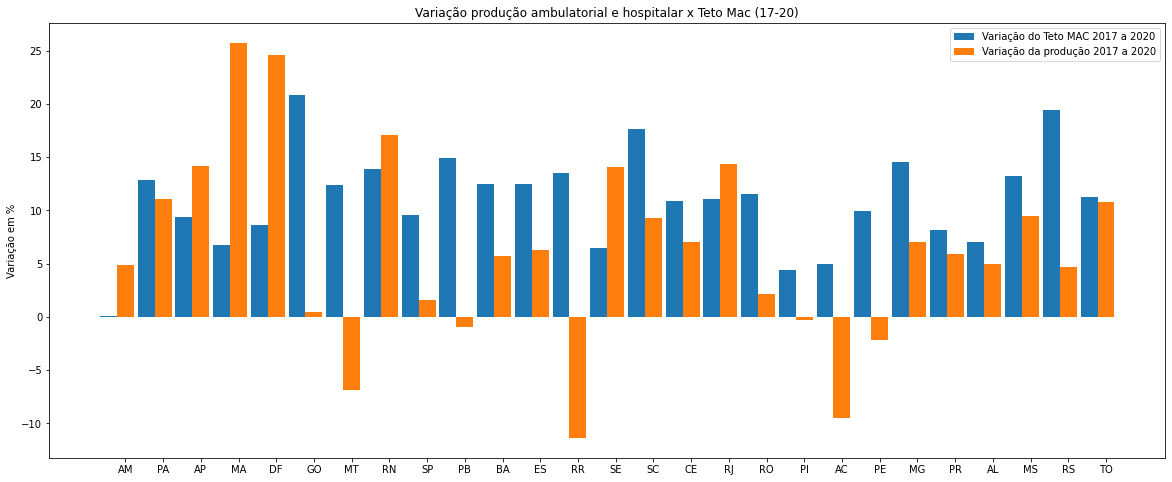

In [ ]:
plt.figure(figsize=(20,8))
X = np.arange(len(teto_prod['Variação_teto_17_20(%)']))
plt.bar(X,'Variação_teto_17_20(%)', data=teto_prod, width = 0.45)
plt.bar(X + 0.45,'Variação_prod_17_20(%)', data=teto_prod, width = 0.45)
plt.legend(['Variação do Teto MAC 2017 a 2020', 'Variação da produção 2017 a 2020'])
plt.xticks([i + 0.45 for i in range(27)], teto_prod['UF'])
plt.title('Variação produção ambulatorial e hospitalar x Teto Mac (17-20)', fontsize=12)
plt.ylabel('Variação em %')
plt.show()

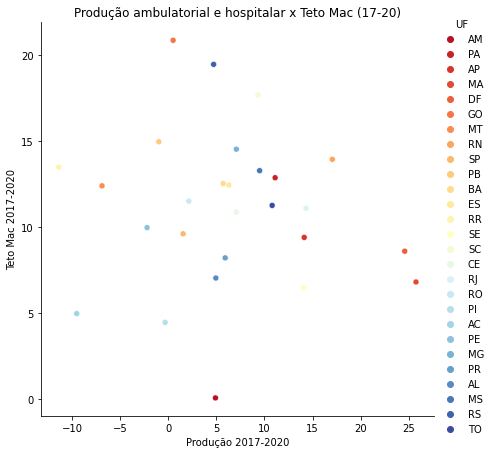

In [ ]:
sns.relplot(x="Variação_prod_17_20(%)", y="Variação_teto_17_20(%)", hue='UF', data=teto_prod, height=6, palette='RdYlBu')
plt.title('Produção ambulatorial e hospitalar x Teto Mac (17-20)', fontsize=12)
plt.xlabel('Produção 2017-2020')
plt.ylabel('Teto Mac 2017-2020')
plt.show()

## **Conclusão** ##

Por fim, verifica-se que para alguns estados os recursos recebidos pelo Teto MAC não têm impulsionado na mesma proporção a produção de procedimentos hospitalares e ambulatoriais. Os estados de Roraima, Mato Grosso, Acre, Pernambuco, Piauí e Paraíba, por exemplo, apresentaram nesse espaço de tempo (2017 a 2020) uma variação positiva de recursos do Teto MAC, mas apresentando uma diminuição no nível de produção no mesmo período. Na ponta oposta, merecem destaque o Distrito Federal, Amapá, Maranhão, Rio Grande do Norte e Rio de Janeiro, que apresentaram uma variação na produção de serviços maior que a variação no quantitativo de recursos recebidos. Em relação ao Distrito Federal, cabe destacar ainda que a unidade federativa se posiciona entre os 5 últimos estado quanto ao total per capita em relação ao recebimento de recursos do Teto MAC, mas entre os 6 primeiros entes que mais produzem serviços de média e alta complexidade per capita.

Já o gráfico de dispersão indica que não há um padrão específico nessa relação entre a variação dos recursos MAC recebidos e a produção de serviços ambulatoriais e hospitalares, havendo casos de baixa variação na produção, com alta no recebimento de recursos, e com alta variação na produção, com baixa variação nos recursos recebidos.
